<a href="https://colab.research.google.com/github/neuish/Logistic-Regression-Project/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This project aims to develop a Logistic regression model to analyze customer satisfaction for an airline company


The dataset consists of the details of customers who have already flown with them. The feedback of the customers on various context and their flight data has been consolidated.



In [ ]:
#importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/logistic Regression/Invistico_Airline.csv')

In [ ]:
# first few rows of data

df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
#  data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
# describing data


df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
# count null

df.isnull().sum()


,0
satisfaction,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0


In [ ]:
# Drop rows with any null values
df.dropna(inplace=True)


In [ ]:
# Count duplicates based on all columns
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [ ]:
# renaming column name for consistency

df.rename(columns={'satisfaction': 'Satisfaction'}, inplace=True)

In [ ]:
# datatype of columns

df.dtypes


,0
Satisfaction,object
Gender,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64


In [ ]:
#  making sure the column data typs is consistent

# Identify all numeric columns (int and float)
numeric_cols = df.select_dtypes(include=['number']).columns

# Convert the numeric columns (except the ones to keep as float) to int
df[numeric_cols] = df[numeric_cols].fillna(0).astype(int)

# Check the data types to confirm
print(df.dtypes)


Satisfaction                         object
Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Seat comfort                          int64
Departure/Arrival time convenient     int64
Food and drink                        int64
Gate location                         int64
Inflight wifi service                 int64
Inflight entertainment                int64
Online support                        int64
Ease of Online booking                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Cleanliness                           int64
Online boarding                       int64
Departure Delay in Minutes            int64
Arrival Delay in Minutes        

In [ ]:
# lowercasing the data values for columns with string for consistency

# Apply .str.lower() to all object (string) columns
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').apply(lambda x: x.str.lower())


In [ ]:
df.head()

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,female,loyal customer,65,personal travel,eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0
1,satisfied,male,loyal customer,47,personal travel,business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305
2,satisfied,female,loyal customer,15,personal travel,eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0
3,satisfied,female,loyal customer,60,personal travel,eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0
4,satisfied,female,loyal customer,70,personal travel,eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0


In [ ]:
# checking if columns have any data type mixed just in case

for col in df.select_dtypes(include='object').columns:
    unique_types = df[col].map(type).nunique()
    if unique_types > 1:
        print(f"Column '{col}' has mixed types!")

In [ ]:
print(df.columns)

Index(['Satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


In [ ]:
# column value count to underatsnd the data distribution
for col in df.columns:
    print(f"\n Column: {col}")

    # Print value counts including NaNs
    print(" Value Counts:")
    print(df[col].value_counts(dropna=False))



 Column: Satisfaction
 Value Counts:
Satisfaction
satisfied       70882
dissatisfied    58605
Name: count, dtype: int64

 Column: Gender
 Value Counts:
Gender
female    65703
male      63784
Name: count, dtype: int64

 Column: Customer Type
 Value Counts:
Customer Type
loyal customer       105773
disloyal customer     23714
Name: count, dtype: int64

 Column: Age
 Value Counts:
Age
39    3681
25    3501
40    3203
44    3099
41    3081
      ... 
74      61
76      60
79      52
78      44
85      25
Name: count, Length: 75, dtype: int64

 Column: Type of Travel
 Value Counts:
Type of Travel
business travel    89445
personal travel    40042
Name: count, dtype: int64

 Column: Class
 Value Counts:
Class
business    61990
eco         58117
eco plus     9380
Name: count, dtype: int64

 Column: Flight Distance
 Value Counts:
Flight Distance
1963    92
1812    87
1639    87
1789    86
1981    85
        ..
5621     1
5842     1
5736     1
5063     1
5345     1
Name: count, Length: 5397, dt

<ipython-input-18-b4f42612090c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


<Figure size 1000x600 with 0 Axes>

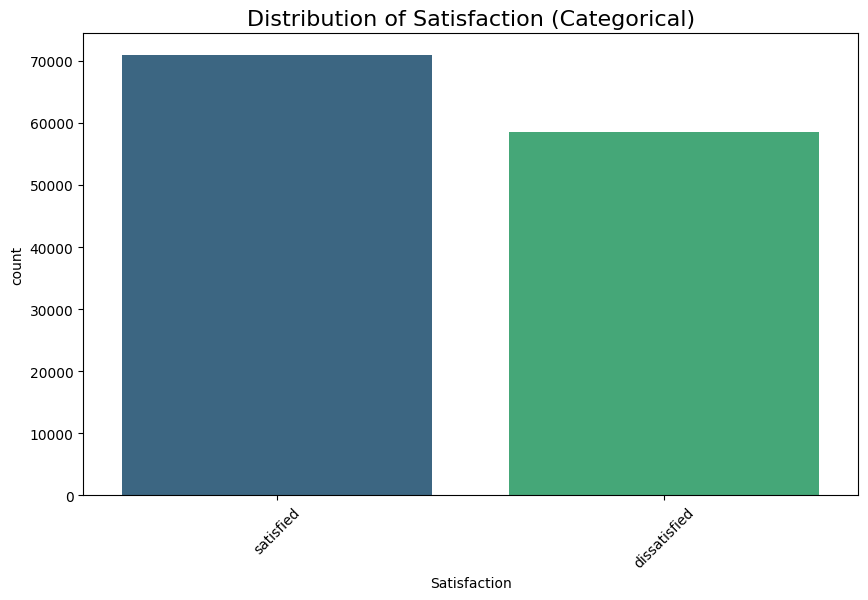

<ipython-input-18-b4f42612090c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


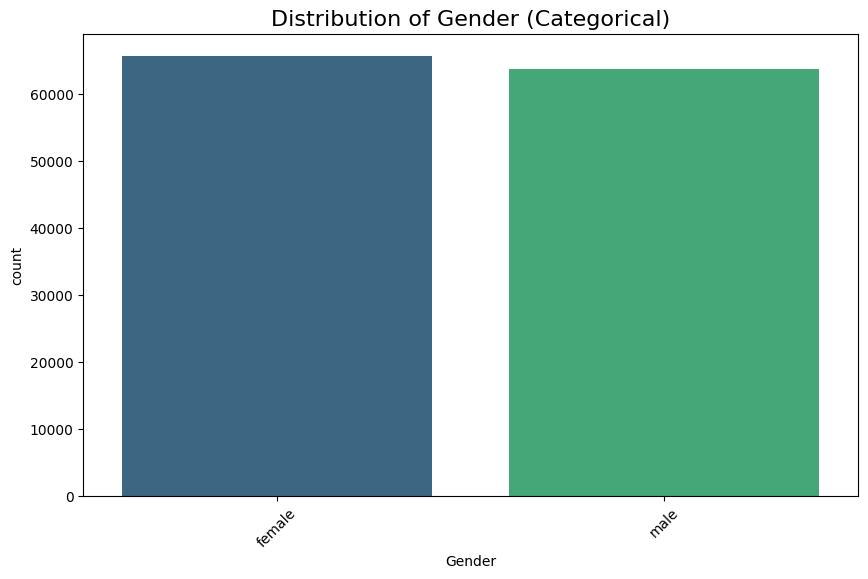

<ipython-input-18-b4f42612090c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


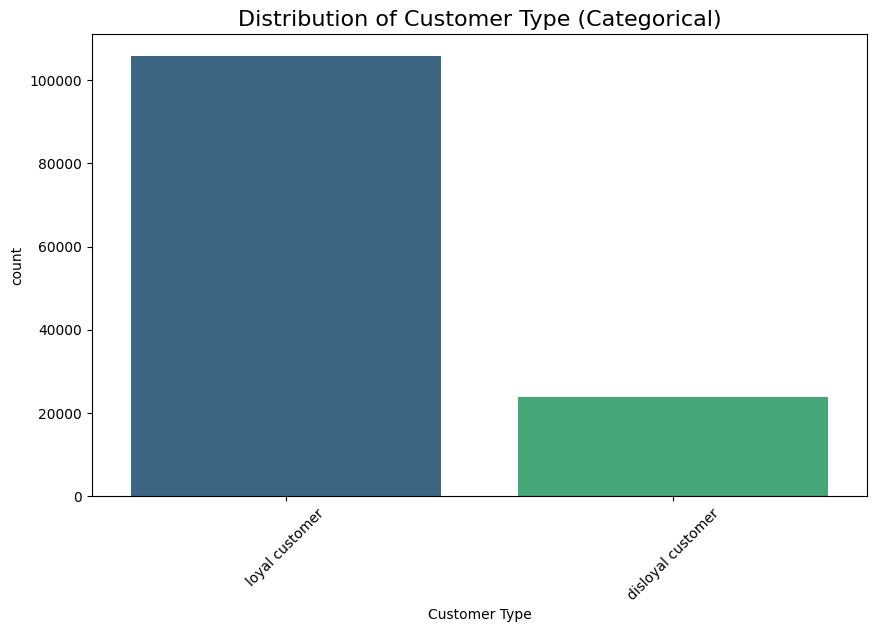

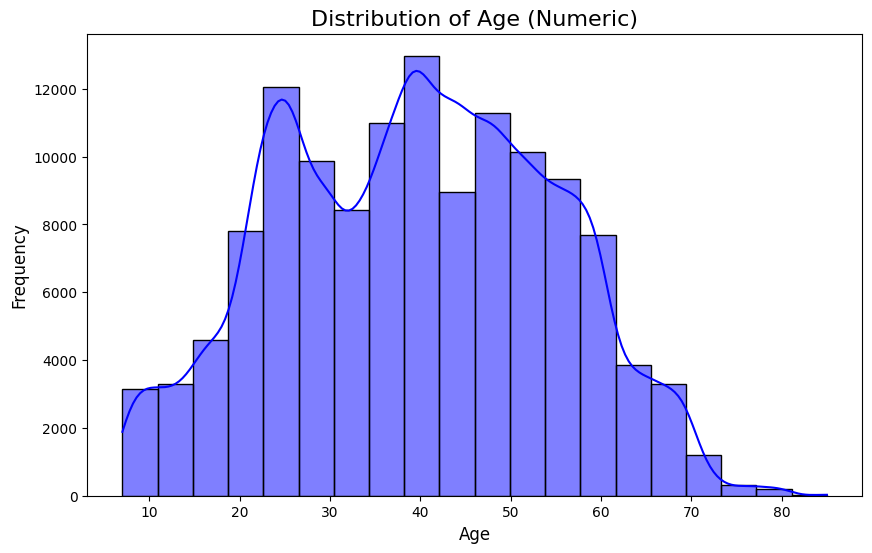

<ipython-input-18-b4f42612090c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


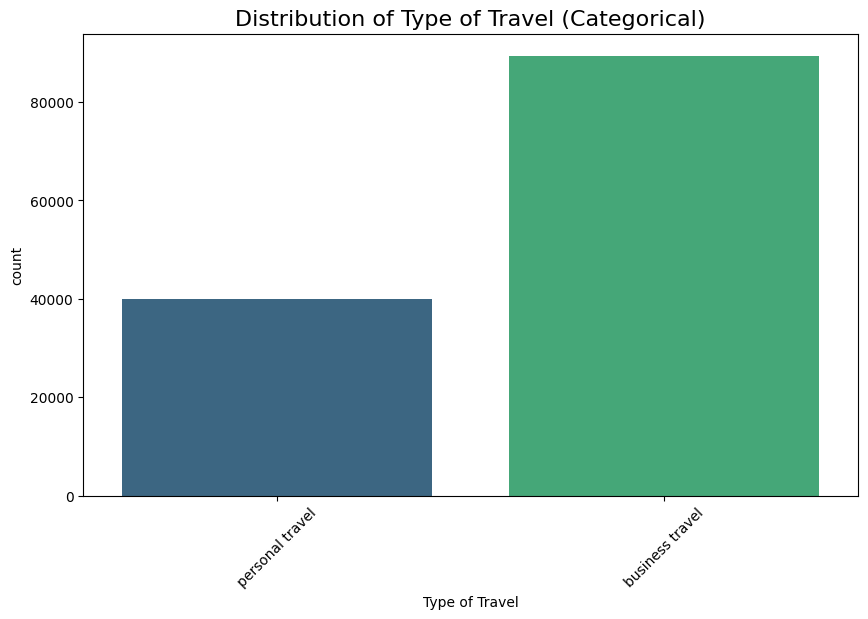

<ipython-input-18-b4f42612090c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


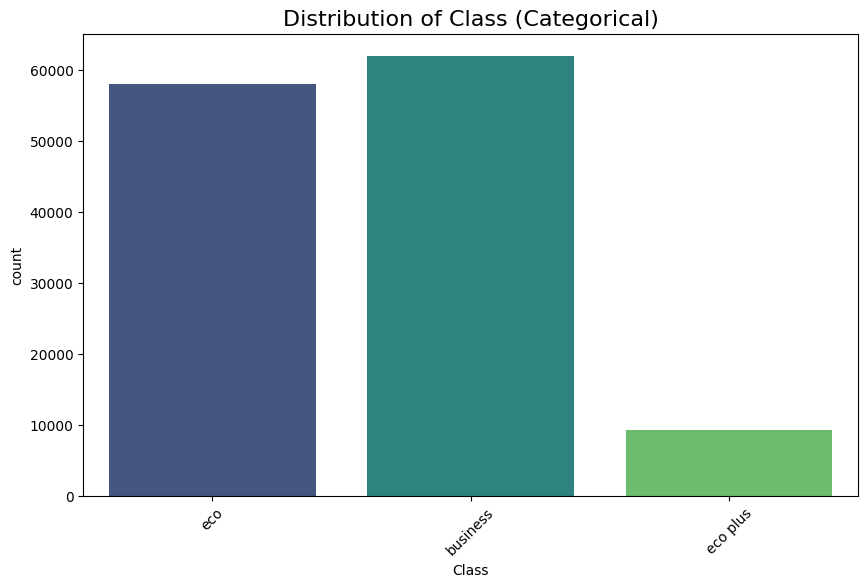

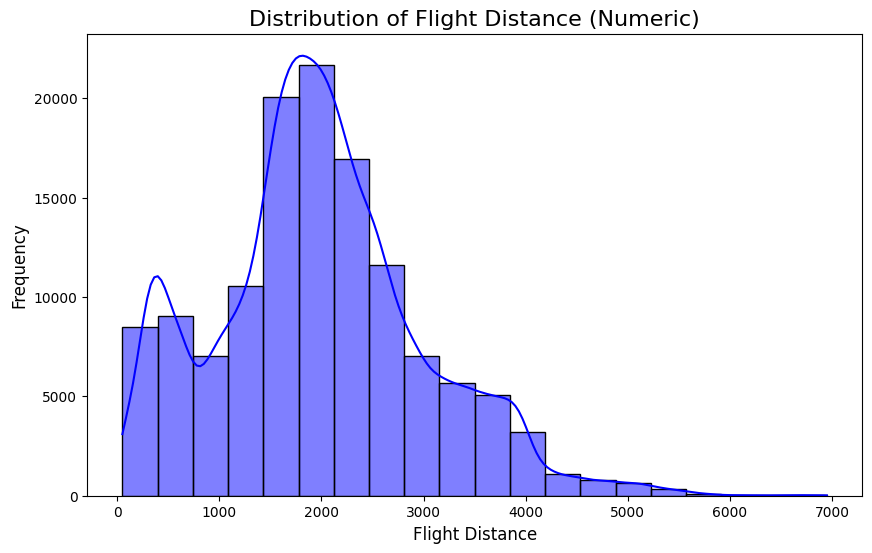

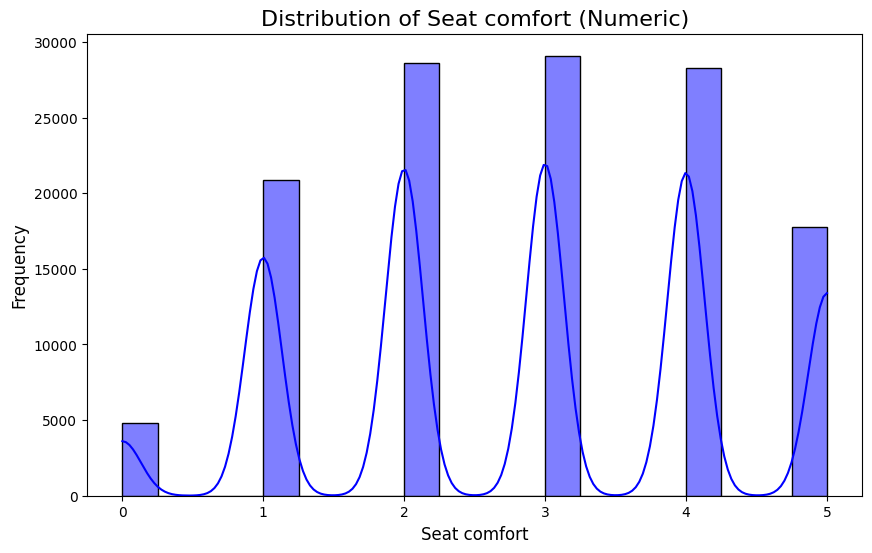

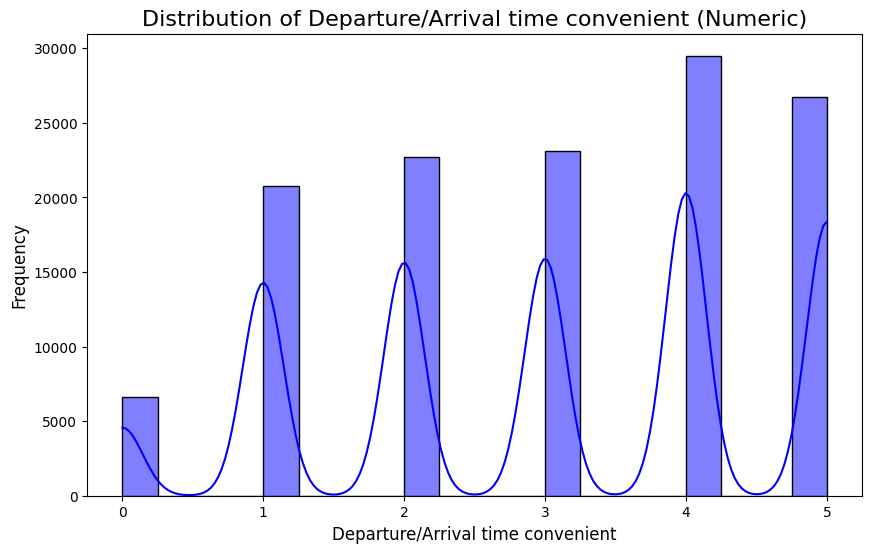

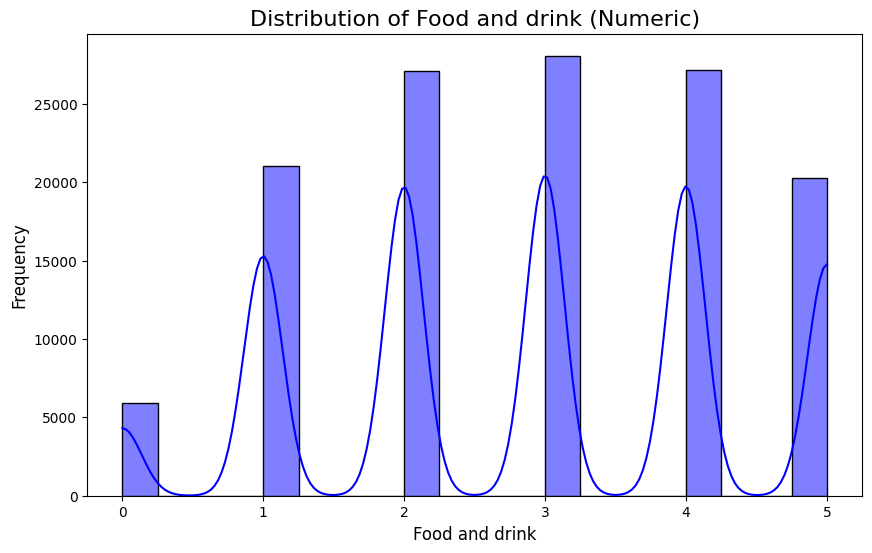

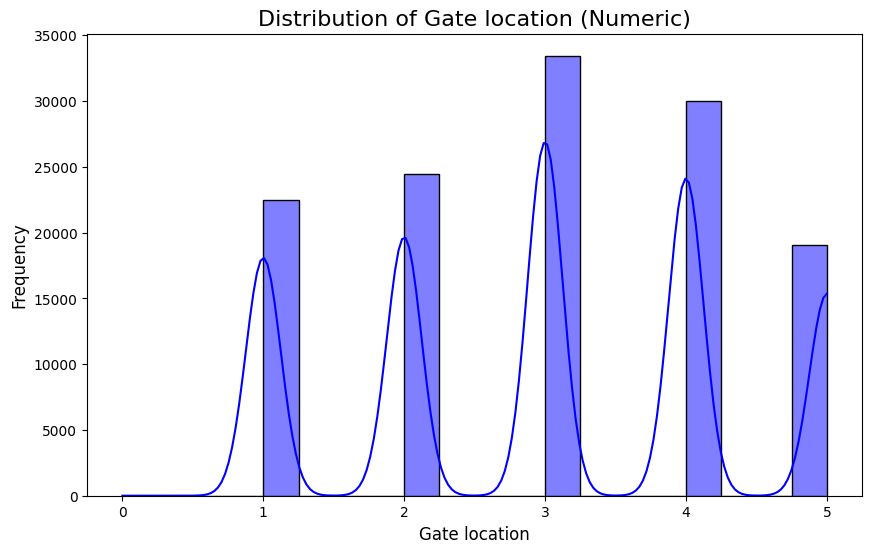

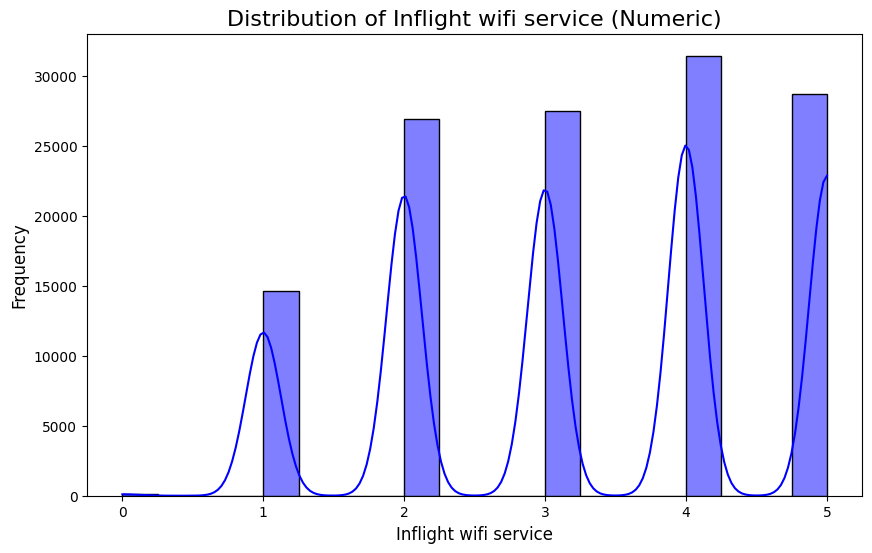

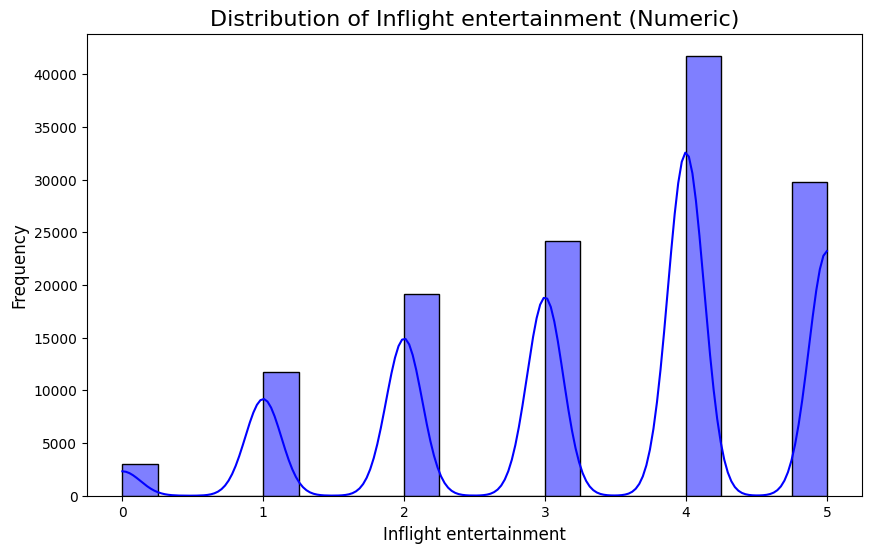

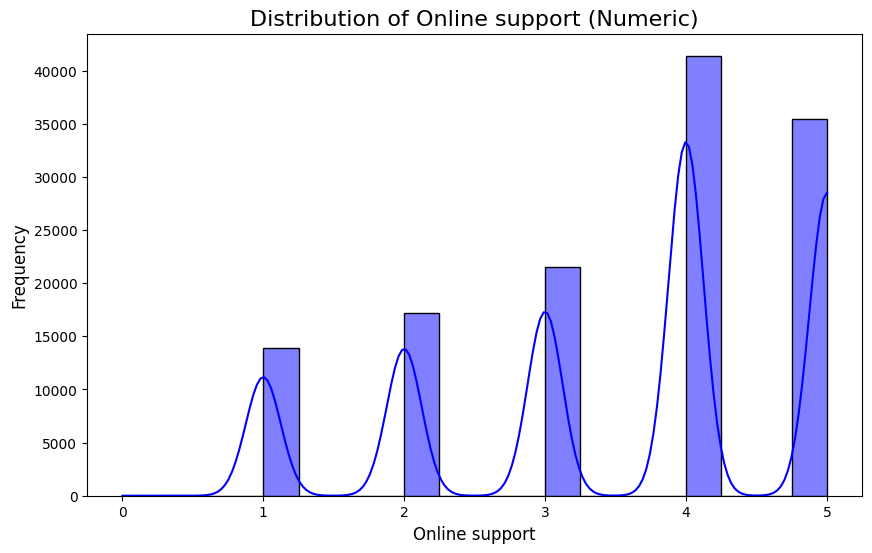

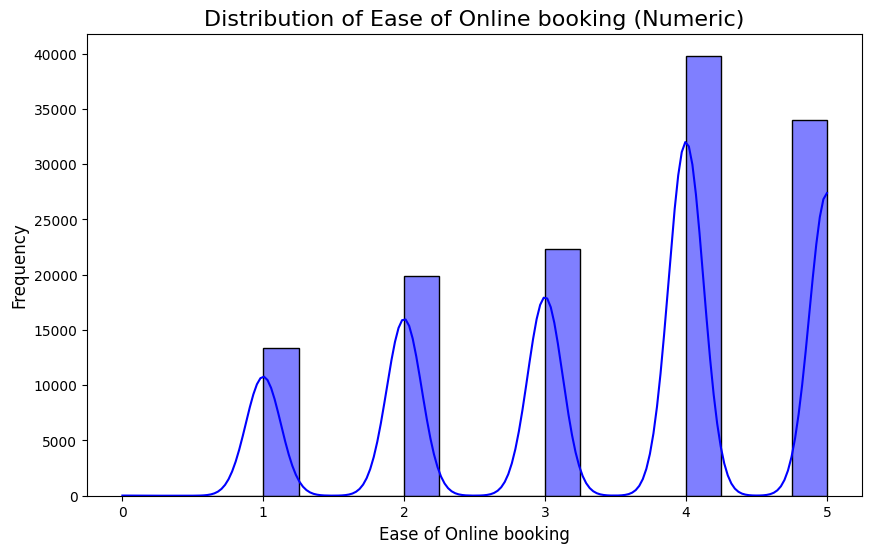

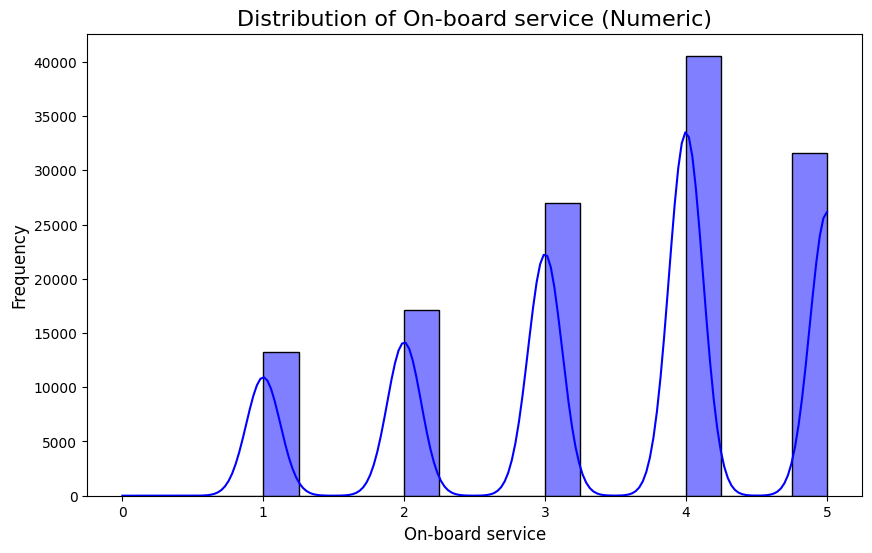

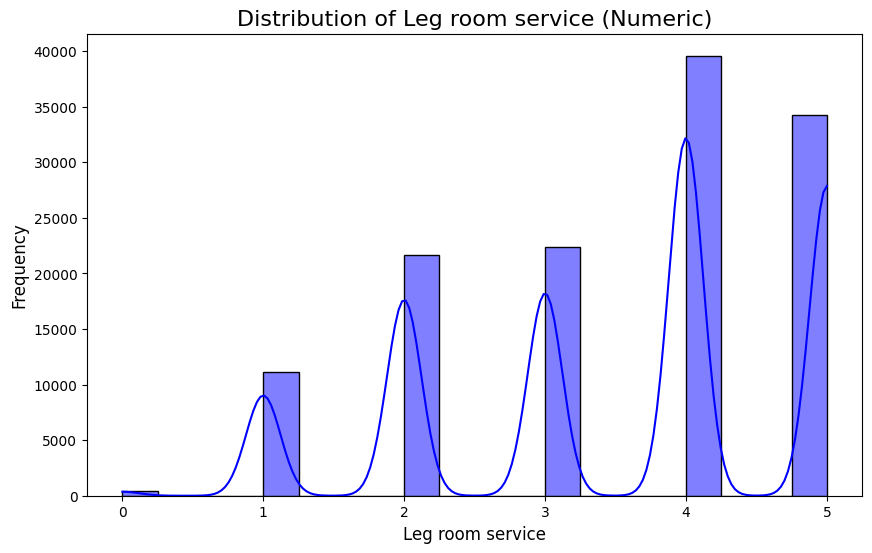

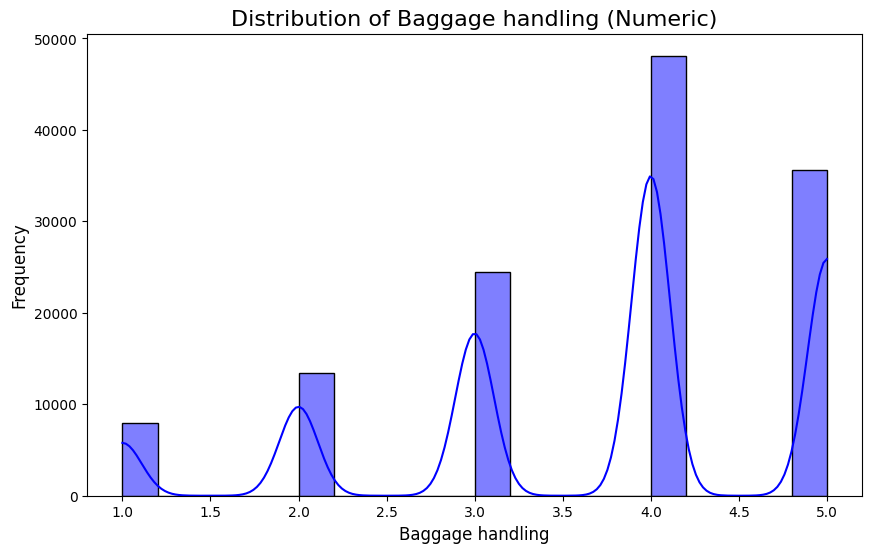

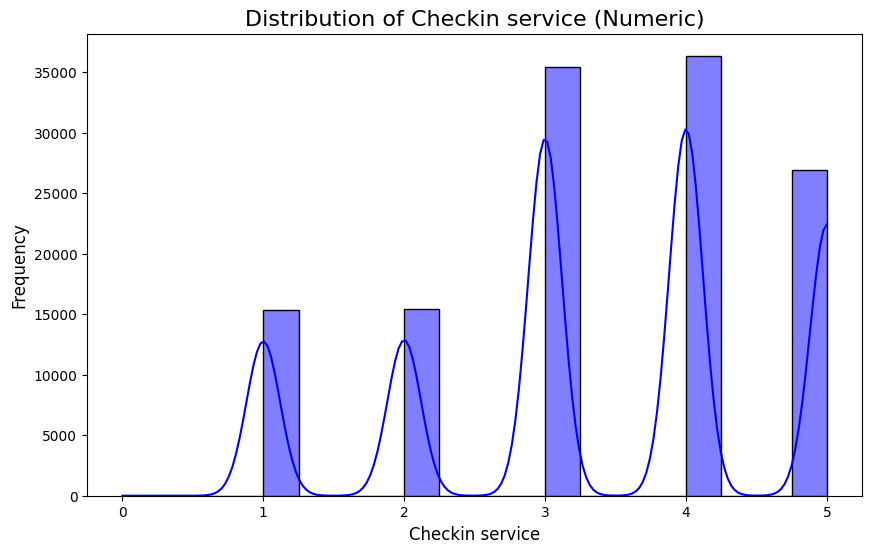

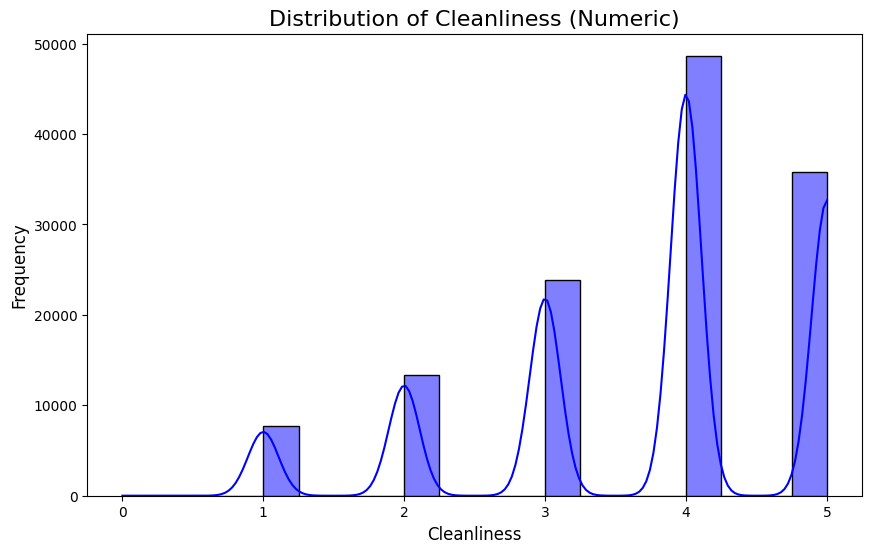

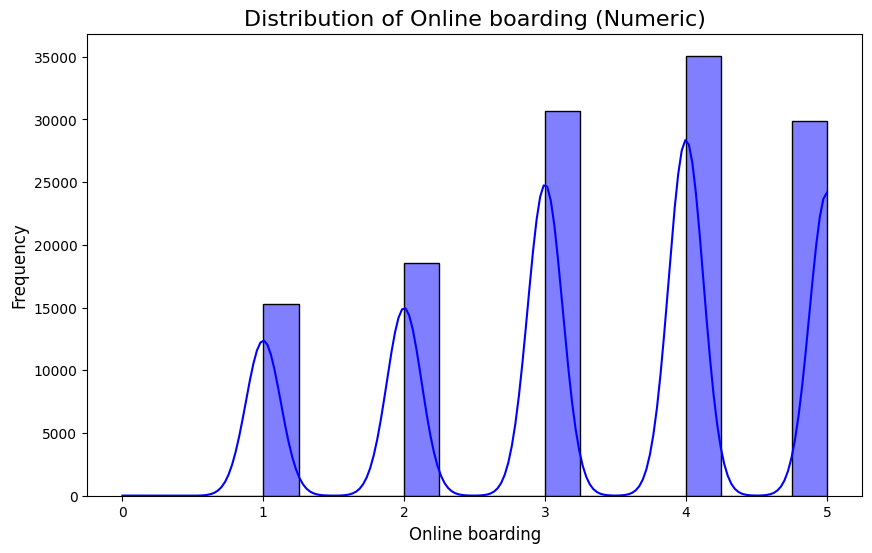

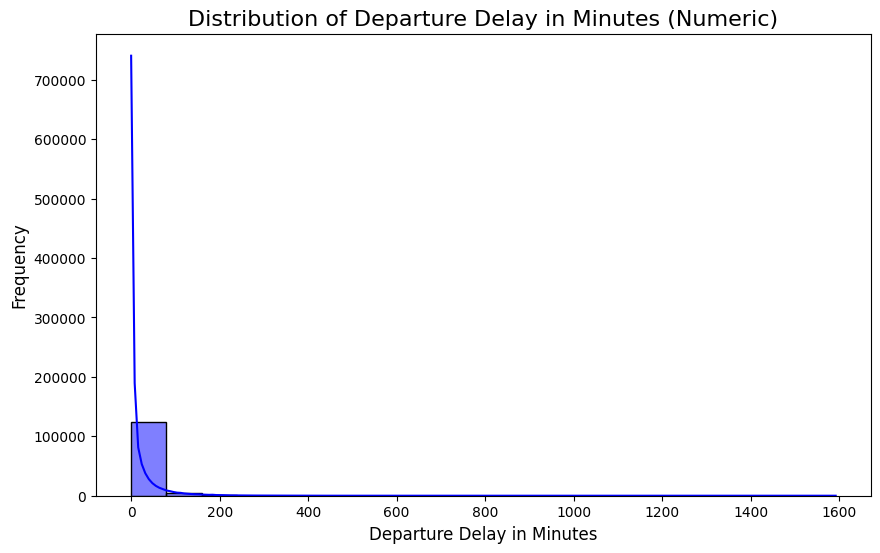

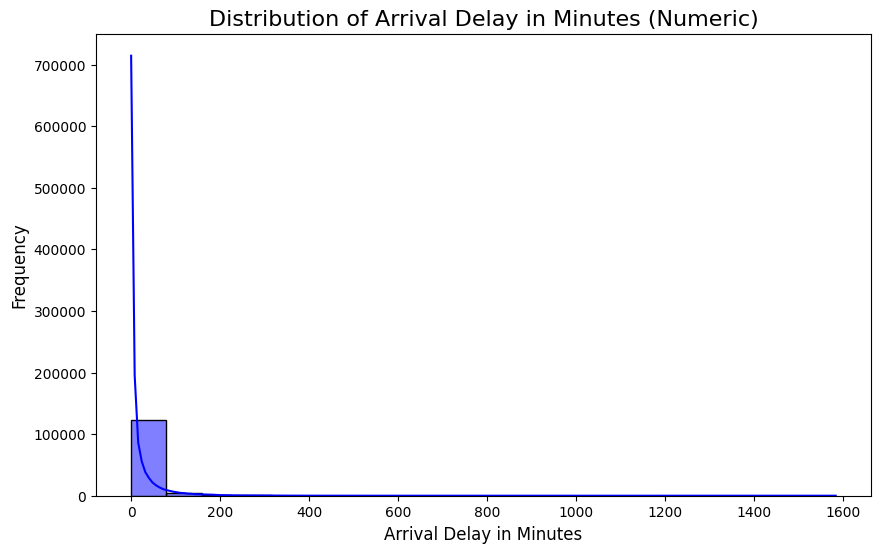

In [ ]:
# visualizing the data distribution with necessary plots

import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the plots
plt.figure(figsize=(10, 6))

# Loop through each column and plot its distribution
for col in df.columns:
    plt.figure(figsize=(10, 6))

    # For categorical data (e.g., object types)
    if df[col].dtype == 'object':
        sns.countplot(data=df, x=col, palette='viridis')
        plt.title(f"Distribution of {col} (Categorical)", fontsize=16)
        plt.xticks(rotation=45)
        plt.show()

    # For numeric data (e.g., int64 or float64)
    elif df[col].dtype in ['int64', 'float64']:
        # Histogram for numeric columns
        sns.histplot(df[col], kde=True, color='blue', bins=20)
        plt.title(f"Distribution of {col} (Numeric)", fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.show()


In [ ]:
# List of columns to be deleted based on the value count and plot
columns_to_delete = [
    'Customer Type', 'Class', 'Flight Distance', 'Gate location',
    'Inflight wifi service', 'Inflight entertainment', 'Online support',
    'Ease of Online booking', 'On-board service', 'Leg room service',
    'Checkin service', 'Cleanliness', 'Online boarding'
]

# Drop the specified columns
df = df.drop(columns=columns_to_delete)

# Verify the changes
print(df.columns)


Index(['Satisfaction', 'Gender', 'Age', 'Type of Travel', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink',
       'Baggage handling', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


In [ ]:
print(df.columns)

Index(['Satisfaction', 'Gender', 'Age', 'Type of Travel', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink',
       'Baggage handling', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


In [ ]:
for col in df.columns:
    print(f"\n Column: {col}")

    # Print value counts including NaNs
    print(" Value Counts:")
    print(df[col].value_counts(dropna=False))



 Column: Satisfaction
 Value Counts:
Satisfaction
satisfied       70882
dissatisfied    58605
Name: count, dtype: int64

 Column: Gender
 Value Counts:
Gender
female    65703
male      63784
Name: count, dtype: int64

 Column: Age
 Value Counts:
Age
39    3681
25    3501
40    3203
44    3099
41    3081
      ... 
74      61
76      60
79      52
78      44
85      25
Name: count, Length: 75, dtype: int64

 Column: Type of Travel
 Value Counts:
Type of Travel
business travel    89445
personal travel    40042
Name: count, dtype: int64

 Column: Seat comfort
 Value Counts:
Seat comfort
3    29096
2    28645
4    28315
1    20882
5    17768
0     4781
Name: count, dtype: int64

 Column: Departure/Arrival time convenient
 Value Counts:
Departure/Arrival time convenient
4    29504
5    26723
3    23110
2    22735
1    20771
0     6644
Name: count, dtype: int64

 Column: Food and drink
 Value Counts:
Food and drink
3    28065
4    27129
2    27078
1    21008
5    20285
0     5922
Name: coun

In [ ]:
# maping the values into binary for better analysis

# Map values in the 'Satisfaction' column
df['Satisfaction'] = df['Satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

# Map values in the 'Gender' column
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

# Map values in the 'Type of Travel' column
df['Type of Travel'] = df['Type of Travel'].map({'business travel': 1, 'personal travel': 0})

# Verify the changes
print(df[['Satisfaction', 'Gender', 'Type of Travel']].head())


   Satisfaction  Gender  Type of Travel
0             1       0               0
1             1       1               0
2             1       0               0
3             1       0               0
4             1       0               0


In [ ]:
# grouping the age group and minutes for flight delay

age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['Below 20', 'Below 30', 'Below 40', 'Below 50', 'Below 60', 'Below 70']

df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Define custom arrival and departure delay intervals
delay_bins = [0, 10, 20, 30, 40, 50, 60, float('inf')]  # Below 10, 10-19, 20-29, etc.
delay_labels = ['Below 10', '10-19', '20-29', '30-39', '40-49', '50-59', 'Above 60']

df['Arrival Delay Group'] = pd.cut(df['Arrival Delay in Minutes'], bins=delay_bins, labels=delay_labels, right=False)
df['Departure Delay Group'] = pd.cut(df['Departure Delay in Minutes'], bins=delay_bins, labels=delay_labels, right=False)

# Display the grouped columns
print(df[['Age Group', 'Arrival Delay Group', 'Departure Delay Group']].head())

# Display value counts for the newly created groups
print("\nValue counts for Age Group:")
print(df['Age Group'].value_counts())

print("\nValue counts for Arrival Delay Group:")
print(df['Arrival Delay Group'].value_counts())

print("\nValue counts for Departure Delay Group:")
print(df['Departure Delay Group'].value_counts())


  Age Group Arrival Delay Group Departure Delay Group
0  Below 70            Below 10              Below 10
1  Below 50            Above 60              Above 60
2  Below 20            Below 10              Below 10
3  Below 70            Below 10              Below 10
4  Below 70            Below 10              Below 10

Value counts for Age Group:
Age Group
Below 50    29555
Below 30    26098
Below 40    25623
Below 60    23902
Below 70    12168
Below 20    12141
Name: count, dtype: int64

Value counts for Arrival Delay Group:
Arrival Delay Group
Below 10    92117
10-19       11713
Above 60     9291
20-29        6744
30-39        4332
40-49        3087
50-59        2203
Name: count, dtype: int64

Value counts for Departure Delay Group:
Departure Delay Group
Below 10    93473
10-19       11006
Above 60     9080
20-29        6496
30-39        4274
40-49        2970
50-59        2188
Name: count, dtype: int64


In [ ]:
# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        # Calculate Q1, Q3, and IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers (values outside the bounds)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numeric columns to check for outliers (e.g., 'Departure Delay in Minutes', 'Arrival Delay in Minutes')
numeric_cols = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Remove outliers
df_cleaned = remove_outliers_iqr(df, numeric_cols)

# Display new DataFrame shape after removing outliers
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")


Original data shape: (129487, 13)
Cleaned data shape: (96111, 13)


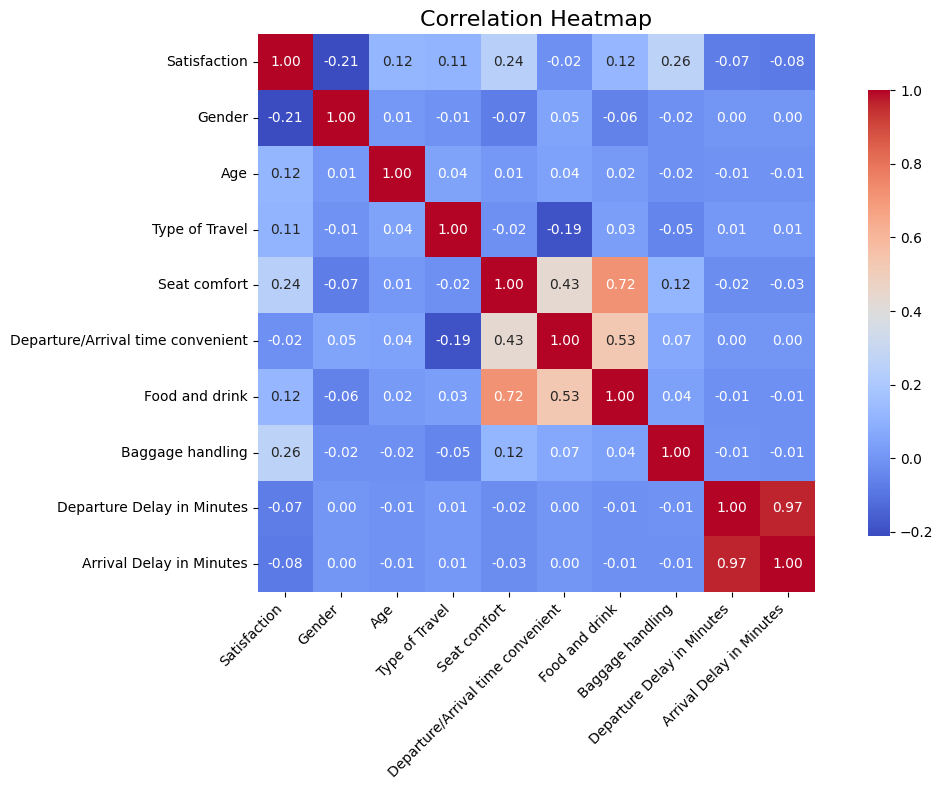

In [ ]:
# plotting heat map to check the correlation

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Drop both the original and grouped arrival delay columns
df.drop(['Arrival Delay in Minutes', 'Arrival Delay Group', 'Age', 'Departure Delay in Minutes'], axis=1, inplace=True)

# Confirm the drop
print("Columns after dropping arrival delay:")
print(df.columns)


Columns after dropping arrival delay:
Index(['Satisfaction', 'Gender', 'Type of Travel', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink',
       'Baggage handling', 'Age Group', 'Departure Delay Group'],
      dtype='object')


In [ ]:
for col in df.columns:
    print(f"\n Column: {col}")

    # Print value counts including NaNs
    print(" Value Counts:")
    print(df[col].value_counts(dropna=False))


 Column: Satisfaction
 Value Counts:
Satisfaction
1    70882
0    58605
Name: count, dtype: int64

 Column: Gender
 Value Counts:
Gender
0    65703
1    63784
Name: count, dtype: int64

 Column: Type of Travel
 Value Counts:
Type of Travel
1    89445
0    40042
Name: count, dtype: int64

 Column: Seat comfort
 Value Counts:
Seat comfort
3    29096
2    28645
4    28315
1    20882
5    17768
0     4781
Name: count, dtype: int64

 Column: Departure/Arrival time convenient
 Value Counts:
Departure/Arrival time convenient
4    29504
5    26723
3    23110
2    22735
1    20771
0     6644
Name: count, dtype: int64

 Column: Food and drink
 Value Counts:
Food and drink
3    28065
4    27129
2    27078
1    21008
5    20285
0     5922
Name: count, dtype: int64

 Column: Baggage handling
 Value Counts:
Baggage handling
4    48107
5    35623
3    24413
2    13388
1     7956
Name: count, dtype: int64

 Column: Age Group
 Value Counts:
Age Group
Below 50    29555
Below 30    26098
Below 40    256

In [ ]:
# List of columns to encode the catagorical values
categorical_cols = [
    'Gender',
    'Type of Travel',
    'Seat comfort',
    'Departure/Arrival time convenient',
    'Food and drink',
    'Baggage handling',
    'Age Group',
    'Departure Delay Group'
]

# Create dummy variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# View new shape and columns
print("New shape after encoding:", df_encoded.shape)
print("Encoded columns preview:")
print(df_encoded.columns.tolist())


New shape after encoding: (129487, 41)
Encoded columns preview:
['Satisfaction', 'Gender_0', 'Gender_1', 'Type of Travel_0', 'Type of Travel_1', 'Seat comfort_0', 'Seat comfort_1', 'Seat comfort_2', 'Seat comfort_3', 'Seat comfort_4', 'Seat comfort_5', 'Departure/Arrival time convenient_0', 'Departure/Arrival time convenient_1', 'Departure/Arrival time convenient_2', 'Departure/Arrival time convenient_3', 'Departure/Arrival time convenient_4', 'Departure/Arrival time convenient_5', 'Food and drink_0', 'Food and drink_1', 'Food and drink_2', 'Food and drink_3', 'Food and drink_4', 'Food and drink_5', 'Baggage handling_1', 'Baggage handling_2', 'Baggage handling_3', 'Baggage handling_4', 'Baggage handling_5', 'Age Group_Below 20', 'Age Group_Below 30', 'Age Group_Below 40', 'Age Group_Below 50', 'Age Group_Below 60', 'Age Group_Below 70', 'Departure Delay Group_Below 10', 'Departure Delay Group_10-19', 'Departure Delay Group_20-29', 'Departure Delay Group_30-39', 'Departure Delay Group_4

In [ ]:
# Create dummy variables with all categories
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Convert all boolean columns (from get_dummies) to int (0/1)
df_encoded = df_encoded.astype(int)


In [ ]:
# Show final preview
print("Final DataFrame Preview:")
print(df_encoded.head())

Final DataFrame Preview:
   Satisfaction  Gender_0  Gender_1  Type of Travel_0  Type of Travel_1  \
0             1         1         0                 1                 0   
1             1         0         1                 1                 0   
2             1         1         0                 1                 0   
3             1         1         0                 1                 0   
4             1         1         0                 1                 0   

   Seat comfort_0  Seat comfort_1  Seat comfort_2  Seat comfort_3  \
0               1               0               0               0   
1               1               0               0               0   
2               1               0               0               0   
3               1               0               0               0   
4               1               0               0               0   

   Seat comfort_4  ...  Age Group_Below 50  Age Group_Below 60  \
0               0  ...                   0 

In [ ]:
# Show structure
print("\n DataFrame Info:")
df_encoded.info()


 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   Satisfaction                         129487 non-null  int64
 1   Gender_0                             129487 non-null  int64
 2   Gender_1                             129487 non-null  int64
 3   Type of Travel_0                     129487 non-null  int64
 4   Type of Travel_1                     129487 non-null  int64
 5   Seat comfort_0                       129487 non-null  int64
 6   Seat comfort_1                       129487 non-null  int64
 7   Seat comfort_2                       129487 non-null  int64
 8   Seat comfort_3                       129487 non-null  int64
 9   Seat comfort_4                       129487 non-null  int64
 10  Seat comfort_5                       129487 non-null  int64
 11  Departure/Arrival time con

EDA Complete

Now Test Train - Satisfaction

In [ ]:
# importing relevant libraries

import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Split the encoded DataFrame
final_train, final_test = train_test_split(df_encoded, train_size=0.7, random_state=100)

# Check shapes
print("Train shape:", final_train.shape)
print("Test shape:", final_test.shape)

Train shape: (90640, 41)
Test shape: (38847, 41)


Creating the test train split

In [ ]:
# Separate features (x) and target (y)
x = df_encoded.drop(['Satisfaction'], axis=1)
y = df_encoded['Satisfaction']


In [ ]:
y.head()

,Satisfaction
0,1
1,1
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (90640, 40)
X_test shape: (38847, 40)
y_train shape: (90640,)
y_test shape: (38847,)


In [ ]:
# calculating the satisfaction rate

satisfaction = sum(df_encoded['Satisfaction'])/len(df_encoded['Satisfaction'].index)
satisfaction

0.54740630333547

Building the first model

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.GLM(y_train, (sm.add_constant(x_train)), family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Satisfaction   No. Observations:                90640
Model:                            GLM   Df Residuals:                    90607
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37825.
Date:                Mon, 21 Apr 2025   Deviance:                       75651.
Time:                        16:19:39   Pearson chi2:                 2.81e+05
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4186
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.4165      0.023     18.464      0.000       0.372       0.461
Gender_0                                0.6266      0.014     43.445      0.000       0.598       0.655
Gender_1                               -0.2100      0.015    -14.399      0.000      -0.239      -0.181
Type of Travel_0                        0.0234      0.016      1.437      0.151      -0.008       0.055
Type of Travel_1                        0.3932      0.015     25.812      0.000       0.363       0.423
Seat comfort_0                          7.3502      0.341     21.547      0.000       6.682       8.019
Seat comfort_1                         -2.7649      0.071    -38.806      0.000      -2.905      -2.625
Seat comfort_2                         -3.1599      0.071    -44.674      0.000      -3.298      -3.021
Seat comfort_3                         -3.0888      0.071    -43.724      0.000      -3.227      -2.950
Seat comfort_4                         -1.3775      0.070    -19.733      0.000      -1.514      -1.241
Seat comfort_5                          3.4575      0.109     31.742      0.000       3.244       3.671
Departure/Arrival time convenient_0    -1.0775      0.050    -21.695      0.000      -1.175      -0.980
Departure/Arrival time convenient_1     1.0503      0.028     36.885      0.000       0.994       1.106
Departure/Arrival time convenient_2     1.0343      0.027     38.750      0.000       0.982       1.087
Departure/Arrival time convenient_3     0.9791      0.026     37.778      0.000       0.928       1.030
Departure/Arrival time convenient_4    -0.2107      0.023     -9.134      0.000      -0.256      -0.166
Departure/Arrival time convenient_5    -1.3589      0.031    -43.813      0.000      -1.420      -1.298
Food and drink_0                       -1.5530      0.119    -13.074      0.000      -1.786      -1.320
Food and drink_1                        0.1467      0.038      3.833      0.000       0.072       0.222
Food and drink_2                        0.2161      0.036      6.009      0.000       0.146       0.287
Food and drink_3                        0.1925      0.035      5.471      0.000       0.124       0.261
Food and drink_4                        0.4548      0.034     13.303      0.000       0.388       0.522
Food and drink_5                        0.9594      0.042     22.704      0.000       0.877       1.042
Baggage handling_1                     -0.6281      0.033    -18.856      0.000      -0.693      -0.563
Baggage handling_2                     -0.3938      0.025    -15.618      0.000      -0.443      -0.344
Baggage handling_3                     -0.7566      0.021    -36.277      0.000      -0.797      -0.716
Baggage handling_4                      0.6408      0.016     39.90

now continuing with the RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Define the model (logistic regression)
logreg = LogisticRegression()

In [ ]:
# Initialize RFE with the model and the number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=20)

# Fit the RFE model
rfe = rfe.fit(x_train, y_train)

In [ ]:
# creating a list of all the variables and their RFE rankings

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Gender_0', np.True_, np.int64(1)),
 ('Gender_1', np.False_, np.int64(6)),
 ('Type of Travel_0', np.False_, np.int64(21)),
 ('Type of Travel_1', np.False_, np.int64(3)),
 ('Seat comfort_0', np.True_, np.int64(1)),
 ('Seat comfort_1', np.True_, np.int64(1)),
 ('Seat comfort_2', np.True_, np.int64(1)),
 ('Seat comfort_3', np.True_, np.int64(1)),
 ('Seat comfort_4', np.True_, np.int64(1)),
 ('Seat comfort_5', np.True_, np.int64(1)),
 ('Departure/Arrival time convenient_0', np.True_, np.int64(1)),
 ('Departure/Arrival time convenient_1', np.True_, np.int64(1)),
 ('Departure/Arrival time convenient_2', np.True_, np.int64(1)),
 ('Departure/Arrival time convenient_3', np.True_, np.int64(1)),
 ('Departure/Arrival time convenient_4', np.False_, np.int64(10)),
 ('Departure/Arrival time convenient_5', np.True_, np.int64(1)),
 ('Food and drink_0', np.True_, np.int64(1)),
 ('Food and drink_1', np.False_, np.int64(15)),
 ('Food and drink_2', np.False_, np.int64(13)),
 ('Food and drink_3', np.False

In [ ]:
# storing the selected columns in col

col = x_train.columns[rfe.support_]

In [ ]:
x_train[col].head()

,Gender_0,Seat comfort_0,Seat comfort_1,Seat comfort_2,Seat comfort_3,Seat comfort_4,Seat comfort_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,Departure/Arrival time convenient_5,Food and drink_0,Food and drink_5,Baggage handling_1,Baggage handling_3,Baggage handling_4,Baggage handling_5,Age Group_Below 50,Age Group_Below 60
116927,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1
85019,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
103373,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
104304,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3547,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


Building the Model Based on the selected variables

In [ ]:
# creating the model again

# x_train_sm = sm.add_constant(x_train[col])
# model_one = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
# model_one.fit().summary()

x_train_sm = sm.add_constant(x_train[col])
model_one = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
pred = model_one.fit()
pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Satisfaction   No. Observations:                90640
Model:                            GLM   Df Residuals:                    90620
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38292.
Date:                Mon, 21 Apr 2025   Deviance:                       76584.
Time:                        16:29:24   Pearson chi2:                 2.85e+05
No. Iterations:                    17   Pseudo R-squ. (CS):             0.4126
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.2410      0.068      3.563      0.000       0.108       0.374
Gender_0                                0.8209      0.018     45.513      0.000       0.786       0.856
Seat comfort_0                          7.4823      0.348     21.509      0.000       6.801       8.164
Seat comfort_1                         -2.8948      0.065    -44.800      0.000      -3.021      -2.768
Seat comfort_2                         -3.2521      0.064    -50.992      0.000      -3.377      -3.127
Seat comfort_3                         -3.1865      0.064    -49.860      0.000      -3.312      -3.061
Seat comfort_4                         -1.3453      0.062    -21.598      0.000      -1.467      -1.223
Seat comfort_5                          3.4374      0.107     32.215      0.000       3.228       3.646
Departure/Arrival time convenient_0    -0.9067      0.060    -15.041      0.000      -1.025      -0.789
Departure/Arrival time convenient_1     1.2227      0.033     36.848      0.000       1.158       1.288
Departure/Arrival time convenient_2     1.2336      0.032     39.057      0.000       1.172       1.295
Departure/Arrival time convenient_3     1.1637      0.031     37.359      0.000       1.103       1.225
Departure/Arrival time convenient_5    -1.2827      0.038    -34.011      0.000      -1.357      -1.209
Food and drink_0                       -1.9959      0.144    -13.888      0.000      -2.278      -1.714
Food and drink_5                        0.7688      0.042     18.367      0.000       0.687       0.851
Baggage handling_1                     -0.2134      0.048     -4.420      0.000      -0.308      -0.119
Baggage handling_3                     -0.3873      0.035    -10.973      0.000      -0.456      -0.318
Baggage handling_4                      0.9946      0.031     31.916      0.000       0.934       1.056
Baggage handling_5                      1.8928      0.034     56.126      0.000       1.827       1.959
Age Group_Below 50                      0.9477      0.022     42.776      0.000       0.904       0.991
Age Group_Below 60                      1.0455      0.024     43.105      0.000       0.998       1.093
=======================================================================================================
"""

VIF

In [ ]:
# importing relevant libraries

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train

vif['variables'] = x_train[col].columns

# assigning the column 'VIF' with the VIF values of the variales

vif['VIF'] = [variance_inflation_factor(x_train[col].values,i) for i in range (x_train[col].shape[1])]

# rounding off the VIF values to 2 decimal places

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif

vif

,variables,VIF
4,Seat comfort_3,4.87
6,Seat comfort_5,4.24
3,Seat comfort_2,4.21
2,Seat comfort_1,4.13
1,Seat comfort_0,4.08
5,Seat comfort_4,3.83
12,Food and drink_0,3.44
16,Baggage handling_4,2.97
17,Baggage handling_5,2.75
15,Baggage handling_3,2.37


In [ ]:
# Getting the predicted values on the train set

y_train_pred = pred.predict(x_train_sm)
y_train_pred[:15]

,0
116927,0.997768
85019,0.557374
103373,0.994815
104304,0.840102
3547,0.998690
126720,0.939698
111052,0.732464
19123,0.010909
54790,0.102563
77066,0.303688


In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:15]

array([0.99776838, 0.55737358, 0.99481467, 0.84010233, 0.99868971,
       0.93969785, 0.73246418, 0.01090898, 0.10256331, 0.3036881 ,
       0.99720783, 0.9846189 , 0.91892061, 0.10812668, 0.18369119])

In [ ]:
y_train_pred_final = pd.DataFrame({'Actual': y_train, 'Predicted_Prob': y_train_pred})
y_train_pred_final.head()


,Actual,Predicted_Prob
116927,1,0.997768
85019,0,0.557374
103373,1,0.994815
104304,1,0.840102
3547,1,0.998690


In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final['Predicted_Prob'].apply(lambda x: 1 if x > 0.6 else 0)

In [ ]:
y_train_pred_final.head()

,Actual,Predicted_Prob,Predicted
116927,1,0.997768,1
85019,0,0.557374,0
103373,1,0.994815,1
104304,1,0.840102,1
3547,1,0.998690,1


Evaluating the Model

In [ ]:
# importing relevant libraries

from sklearn import metrics

In [ ]:
# creating the confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final.Predicted)
print(confusion)

[[35406  5529]
 [13582 36123]]


            Predicted: 0	         Predicted: 1
Actual: 0	  36,640 (TN), 	4,295 (FP)

Actual: 1	  24,813 (FN), 	24,892 (TP)

In [ ]:
# true positives
tp = confusion[1,1]

#true negatives
tn = confusion[0,0]

# false positives
fp = confusion[0,1]

# false negatives
fn = confusion[1,0]

In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Actual, y_train_pred_final.Predicted))

0.7891548984995587


In [ ]:
# sensitivity of the model : A measure of how accurately does the model predict the positive outcomes
# sesitivity can also be termed as true positive rate

tp /(tp+fn)

np.float64(0.7267478120913389)

The model has low sensitivity

In [ ]:
# specificity of the model : A measure of how accurately does the model predict negative outcomes

tn /(tn+fp)

np.float64(0.8649322096005863)

In [ ]:
# false positive rate : A measure of how many 0s were predicted as 1

fp /(tn+fp)

np.float64(0.13506779039941372)

So about 13.8% of people who are actually not satisfied were incorrectly predicted as satisfied

In [ ]:
# importing relevant libraries

import matplotlib.pyplot as plt

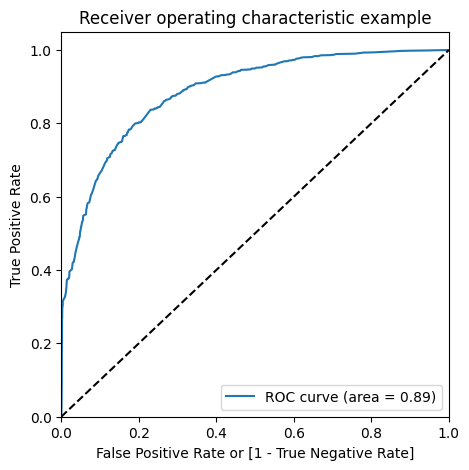

In [ ]:
# preparing the ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Actual, y_train_pred_final.Predicted_Prob)

The area under the ROC curve is 0.89 which depicts that the model is a good classifier

In [ ]:
# checking different probablity cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Predicted_Prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Actual,Predicted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
116927,1,0.997768,1,1,1,1,1,1,1,1,1,1,1
85019,0,0.557374,0,1,1,1,1,1,1,0,0,0,0
103373,1,0.994815,1,1,1,1,1,1,1,1,1,1,1
104304,1,0.840102,1,1,1,1,1,1,1,1,1,1,0
3547,1,0.998690,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# creating a dataframe with information about probability, accuracy, sensitivity and specificity

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
#from sklearn.metrics import confusion_matrix

# tp = confusion[1,1]  true positive
# tn = confusion[0,0]  true negatives
# fp = confusion[0,1]  false positives
# fn = confusion[1,0]  false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])

    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.548378  1.000000  0.000000
0.1   0.1  0.638581  0.993300  0.207866
0.2   0.2  0.720763  0.969601  0.418615
0.3   0.3  0.773897  0.931657  0.582338
0.4   0.4  0.798522  0.881078  0.698278
0.5   0.5  0.804601  0.837622  0.764505
0.6   0.6  0.789155  0.726748  0.864932
0.7   0.7  0.764585  0.647038  0.907316
0.8   0.8  0.706973  0.505865  0.951166
0.9   0.9  0.649625  0.373101  0.985391


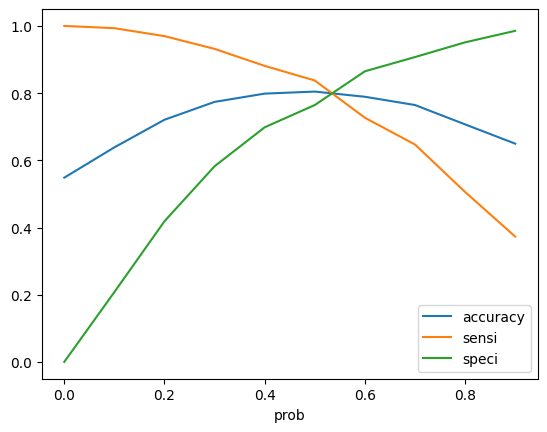

In [ ]:
# plotting probability

cutoff_df.plot.line(x= 'prob', y = ['accuracy','sensi','speci'])
plt.show()

- According to the graph the optimal value of cutoff seems to be around 0.45

Testing the model on test set

In [ ]:
final_test.head()

,Satisfaction,Gender_0,Gender_1,Type of Travel_0,Type of Travel_1,Seat comfort_0,Seat comfort_1,Seat comfort_2,Seat comfort_3,Seat comfort_4,...,Age Group_Below 50,Age Group_Below 60,Age Group_Below 70,Departure Delay Group_Below 10,Departure Delay Group_10-19,Departure Delay Group_20-29,Departure Delay Group_30-39,Departure Delay Group_40-49,Departure Delay Group_50-59,Departure Delay Group_Above 60
59442,1,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
31629,0,0,1,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
97743,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
39608,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
126976,1,1,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
# Get the common columns between 'col' and 'x_test'
common_cols = list(set(col) & set(x_test.columns))

# Select only the common columns from 'x_test'
x_test = x_test[common_cols]

In [ ]:
x_test.head()

,Baggage handling_5,Seat comfort_2,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Seat comfort_5,Food and drink_0,Seat comfort_3,Seat comfort_1,Departure/Arrival time convenient_3,Seat comfort_0
59442,0,0,0,0,0,0,0,0,0,0
31629,1,0,0,0,0,0,1,0,0,0
97743,0,0,0,0,0,0,0,0,0,0
39608,0,0,0,0,1,0,0,0,0,0
126976,1,0,0,0,0,0,0,0,0,0


In [ ]:
# adding the constant to x_test

x_test_sm = sm.add_constant(x_test)

In [ ]:
# Step 2: Ensure x_test has the exact same columns as the training set (including constant)
missing_cols = list(set(col) - set(x_test.columns))

# Add any missing columns with 0s
for c in missing_cols:
    x_test[c] = 0

# Reorder columns to match training set order
x_test = x_test[col]

# Add constant
x_test_sm = sm.add_constant(x_test)

# Step 3: Predict
y_test_pred = model_one_result.predict(x_test_sm)

# Step 4: Preview predictions
y_test_pred[:10]


,0
59442,0.559968
31629,0.258718
97743,0.559968
39608,0.975359
126976,0.894146
38034,0.559968
28510,0.049953
53714,0.144086
40512,0.996755
47273,0.144608


In [ ]:
# creating different columns to store the covert situation and the probability for the same

y_test_final = pd.DataFrame({'Actual' : y_test.values, 'Predicted_Prob' : y_test_pred})

In [ ]:
y_test_final.head()

,Actual,Predicted_Prob
59442,1,0.559968
31629,0,0.258718
97743,0,0.559968
39608,1,0.975359
126976,1,0.894146


In [ ]:
# testing with a cutoff at 0.6 same as train set . We can use different cutoffs as required

y_test_final['Predicted'] = y_test_final.Predicted_Prob.map(lambda x: 1 if x >0.6 else 0)

In [ ]:
# creating the confusion matrix

confusion_one = metrics.confusion_matrix(y_test_final.Actual, y_test_final.Predicted)
print(confusion_one)

[[15954  1716]
 [10735 10442]]


In [ ]:
# the accuracy of the model

print(metrics.accuracy_score(y_test_final.Actual, y_test_final.Predicted))

0.6794861894097356


In [ ]:
# true positives
tp1 = confusion_one[1,1]

#true negatives
tn1 = confusion_one[0,0]

# false positives
fp1 = confusion_one[0,1]

# false negatives
fn1 = confusion_one[1,0]

In [ ]:
# sensitivity of the model : A measure of how accurately does the model predict the positive outcomes
# sesitivity can also be termed as true positive rate

tp1 /(tp1+fn1)

np.float64(0.49308211739150964)

In [ ]:
# specificity of the model : A measure of how accurately does the model predict negative outcomes

tn /(tn+fp)

np.float64(0.8649322096005863)

In [ ]:
# false positive rate : A measure of how many 0s were predicted as 1

fp1 /(tn1+fp1)

np.float64(0.09711375212224109)

Model works well.